# Clustering
I create new dataset with the models. The dataset includes artist name, rank, future growth. Finally I recommend artists for our advertisement clients.

### Import Packages

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

### Load Data

In [2]:
with open('../data/final/rank_df.pickle', 'rb') as rank:
    rank_df = pickle.load(rank)
    rank.close()
with open('../data/final/future_growth.pickle', 'rb') as growth:
    growth_dict = pickle.load(growth)
    growth.close()

In [3]:
rank_df.head()

,Rank
Artist,
Post Malone,1
Ed Sheeran,2
Billie Eilish,3
Drake,4
Ariana Grande,5


### Create New Dataset

In [4]:
rank_df['Future Growth'] = growth_dict.values()

In [5]:
rank_df.head()

,Rank,Future Growth
Artist,,
Post Malone,1,0.299910
Ed Sheeran,2,-0.233435
Billie Eilish,3,1.175315
Drake,4,0.338256
Ariana Grande,5,0.253801


### Clustering

In [6]:
sc = MinMaxScaler()
rank_df.loc[:, ['Rank', 'Future Growth']] = sc.fit_transform(rank_df)

In [7]:
link = linkage(rank_df, method='ward')

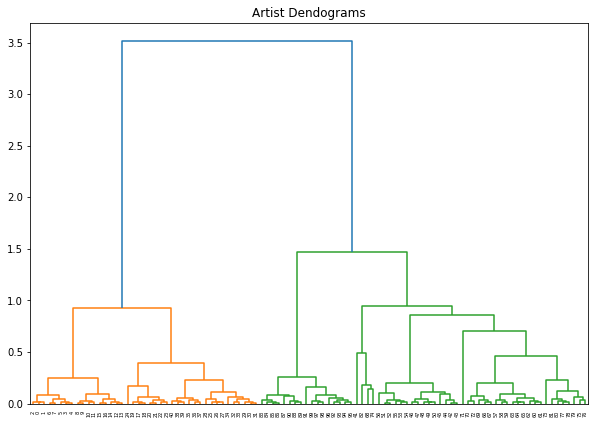

In [8]:
plt.figure(figsize=(10, 7))
plt.title("Artist Dendograms")
dend = dendrogram(link)

In [9]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(rank_df);

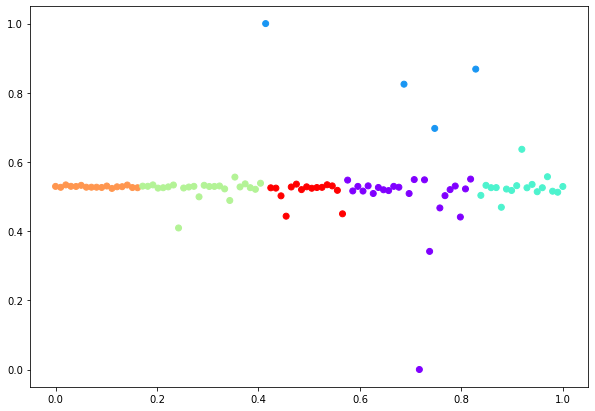

In [10]:
plt.figure(figsize=(10, 7))
plt.scatter(rank_df.iloc[:, 0], rank_df.iloc[:, 1], c=cluster.labels_, cmap='rainbow')

In [11]:
rank_df.iloc[:, 0:2] = sc.inverse_transform(rank_df)

In [12]:
rank_df['label'] = cluster.labels_

In [13]:
rank_df.groupby('label').mean()

,Rank,Future Growth
label,,
0,69.826087,-7.844185
1,67.250000,64.675703
2,92.000000,0.048849
3,29.500000,-1.146448
4,9.000000,0.116655
5,50.000000,-2.723026


In [14]:
rank_df.loc[rank_df.label == 1, :].index

Index(['Lauv', '21 Savage', 'Bebe Rexha', 'Piso 21'], dtype='object', name='Artist')

### Conclusion

I can recommend Lauv, 21 Savage, Bebe Rexha, and Piso 21. That's becuae they have high potential. Also, their ranking is not high. It explains they are not expensive than high rankers.